In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from xgboost import XGBClassifier
from keras.models import Sequential
from keras import callbacks
from collections import Counter
from scipy.stats import randint
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [4]:
df.shape

(270, 14)

In [5]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [6]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
df.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

In [8]:
heart_risk_mapping = {'Presence': 1, 'Absence': 0}

In [9]:
df['Heart Disease'] = df['Heart Disease'].map(heart_risk_mapping)

In [10]:
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0         7              1  
3                        1         7              0  
4                        1         3              0

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# XG_Boost

In [13]:
import xgboost as xgb

In [14]:
params = {"objective": "binary:logistic", "num_class": 1,'learning_rate':0.01,'seed':42,'n_estimators':100
          ,'colsample_bytree':0.8,'max_depth':3,'reg_lambda':0.1,'subsample':0.8}

model = xgb.XGBClassifier(**params)

evals = [(X_train, y_train)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")

print("Cross-Validation accuracy Scores:", cv_scores)
print("Mean AUC:", np.mean(cv_scores))

Cross-Validation accuracy Scores: [0.88636364 0.65116279 0.79069767 0.86046512 0.79069767]
Mean AUC: 0.795877378435518


In [15]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=1,
              num_parallel_tree=None, ...)

In [16]:
y_pred_xg = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xg)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[25  5]
 [ 4 20]]


In [18]:
accuracy_score(y_train, model.predict(X_train))

0.9166666666666666

In [19]:
accuracy_XG = accuracy_score(y_test, y_pred_xg)
precision_XG = precision_score(y_test, y_pred_xg, pos_label=1)
recall_XG = recall_score(y_test, y_pred_xg, pos_label=1)
f1_XG = f1_score(y_test, y_pred_xg, pos_label=1)

In [20]:
print(f'Accuracy:{accuracy_XG}\nPrecision:{precision_XG}\nRecall:{recall_XG}\nf1:{f1_XG}')

Accuracy:0.8333333333333334
Precision:0.8
Recall:0.8333333333333334
f1:0.816326530612245


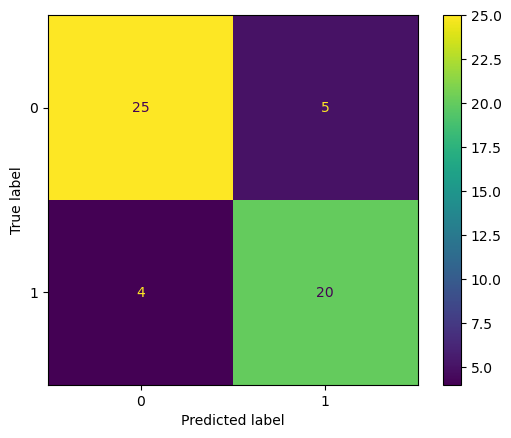

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred_xg)
ConfusionMatrixDisplay(conf_matrix).plot();

# Random Forest

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=150,max_depth=None,min_samples_leaf=4,
                                       random_state=42)

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_scores

array([0.88636364, 0.65116279, 0.79069767, 0.86046512, 0.79069767])

In [24]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=150, random_state=42)

In [25]:
y_pred_rf = rf_classifier.predict(X_test)

In [26]:
accuracy_score(y_train, rf_classifier.predict(X_train))

0.9259259259259259

In [27]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

In [28]:
print(f'Accuracy:{accuracy_rf}\nPrecision:{precision_rf}\nRecall:{recall_rf}\nf1:{f1_rf}')

Accuracy:0.8518518518518519
Precision:0.8333333333333334
Recall:0.8333333333333334
f1:0.8333333333333334


In [29]:
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Stack Classifier

In [30]:
clf1 = LogisticRegression(C=10,penalty='l2')
clf2 = DecisionTreeClassifier(max_depth=None)
clf3 = KNeighborsClassifier(n_neighbors=7)

In [31]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


stacking_classifier = StackingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    final_estimator=LogisticRegression(C=0.1,penalty='l2'),
    stack_method='auto',
)

In [32]:
stacking_classifier.fit(X_train_normalized, y_train)

y_pred_sc = stacking_classifier.predict(X_test_normalized)

In [33]:
acc_training = accuracy_score(y_train, stacking_classifier.predict(X_train_normalized))
print(f'Training Acc: {acc_training}')

Training Acc: 0.9212962962962963


In [34]:
accuracy_sc = accuracy_score(y_test, y_pred_sc)
precision_sc = precision_score(y_test, y_pred_sc, pos_label=1)
recall_sc = recall_score(y_test, y_pred_sc, pos_label=1)
f1_sc = f1_score(y_test, y_pred_sc, pos_label=1)

In [35]:
print(f'Accuracy:{accuracy_sc}\nPrecision:{precision_sc}\nRecall:{recall_sc}\nf1:{f1_sc}')

Accuracy:0.8518518518518519
Precision:0.8333333333333334
Recall:0.8333333333333334
f1:0.8333333333333334


In [36]:
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# SVM

In [37]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [38]:
svm_model = SVC(C=0.1,gamma='scale',kernel='linear')

svm_model.fit(X_train_normalized, y_train)

SVC(C=0.1, kernel='linear')

In [39]:
y_pred_svm = svm_model.predict(X_test_normalized)

In [40]:
accuracy = accuracy_score(y_train, svm_model.predict(X_train_normalized))
print("Training accuracy:", accuracy)

Training accuracy: 0.8611111111111112


In [41]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=1)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=1)
print(f'Accuracy:{accuracy_svm}\nPrecision:{precision_svm}\nRecall:{recall_svm}\nf1:{f1_svm}')

Accuracy:0.8518518518518519
Precision:0.8076923076923077
Recall:0.875
f1:0.8400000000000001


In [42]:
# prompt: now lineplot the accuracies of all four algorithms

plt.plot(['XG_Boost', 'Random Forest', 'Stacking Classifier', 'SVM'],[accuracy_XG, accuracy_rf, accuracy_sc, accuracy_svm])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


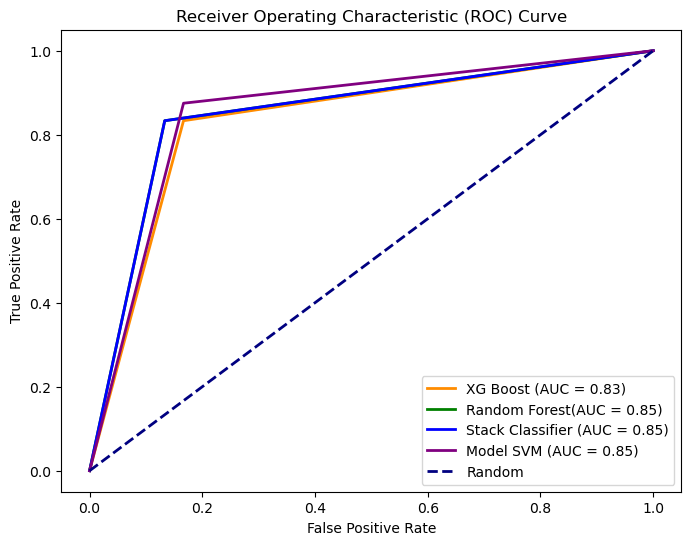

In [43]:
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_xg)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_rf)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_sc)
roc_auc3 = auc(fpr3, tpr3)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'XG Boost (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Random Forest(AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='blue', lw=2, label=f'Stack Classifier (AUC = {roc_auc3:.2f})')
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'Model SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
